In [74]:
from google.cloud import storage
import tempfile
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [32]:
BUCKET_NAME = 'srgan-wagon-project'
STORAGE_LOCATION = 'datasets/kaggle100-original/HR'

In [69]:
def get_images_gcp(n=10):

    client = storage.Client()

    bucket = client.bucket(BUCKET_NAME)

    blobs = bucket.list_blobs(prefix=STORAGE_LOCATION)
    images = []

    for blob in blobs:
        _, temp_local_filename = tempfile.mkstemp()

        # Download file from bucket.
        blob.download_to_filename(temp_local_filename)
        img_hr = cv2.imread(temp_local_filename)
        images.append(img_hr)
        os.remove(temp_local_filename)
    return np.array(images)

In [70]:
images=get_images_gcp()

In [71]:
images.shape

(100, 384, 384, 3)

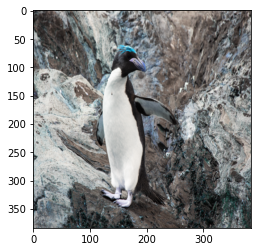

In [76]:
plt.imshow(images[0]);